In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Selected **libraries**

In [33]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd


from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, f1_score,recall_score,precision_score,roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import Callback

**Required Functions and Classes**

In [24]:
def LoadImage(input_images_path,categoria):
  Names=[]
  files_names=os.listdir(input_images_path+"/"+categoria)
  for name in files_names:
    Image=cv2.imread(input_images_path+"/"+categoria+"/"+name)
    b,g,r=cv2.split(Image)
    ImagesSC.append(r)
    Names.append(name)
  return ImagesSC,Names

In [25]:
def ImagesMatrix(TSNEComponent,PCAComponent,RndTSNE,XDatos):
  PCAM,TSNEM=[],[]
  SSX=StandardScaler()
  pca=PCA(n_components=PCAComponent)
  for i in range(XDatos.shape[0]):
    print("Class: "+str(i))
    for j in range(XDatos.shape[1]):
      print("Image: "+str(j))
      Ima=SSX.fit_transform(XDatos[i][j].transpose())
      Lineal = pca.fit_transform(Ima) #PCA
      VarPCA = pca.explained_variance_ratio_
      Suma_eigenvalues = np.cumsum(VarPCA)
      PCAM.append(Lineal.transpose().flatten())
      NoLineal=TSNE(n_components=TSNEComponent,random_state=RndTSNE).fit_transform(Ima) #TSNE
      TSNEM.append(NoLineal.transpose().flatten())
  PCAM=np.array(PCAM)
  TSNEM=np.array(TSNEM)
  return PCAM,TSNEM

In [26]:
def PlotImagesPCATSNE (X,PCAM,TSNEM,Classes):
  for i in range(X.shape[0]):
    for j in range(X.shape[1]):
      print('Class: '+str(i)+ ", Image: " +str(j),str(j+(i*X.shape[1])))
      PlotPCATSNE(PCAM,TSNEM,X,Classes,i,j,int(j+(i*X.shape[1])))

In [37]:
def PlotPCATSNE(MPCA,MTSNE,Image,Classes,Class,NumImage,NumFlattenVector):

  plt.figure(figsize=(10, 5))
  plt.imshow(Image[Class,NumImage,:],cmap='afmhot')
  plt.axis('off')
  plt.title('Class: '+str(Classes[Class])+ ", Image: " +str(NumImage))
  plt.show()

  fig = plt.figure(figsize=(10, 5))

  ax1 = fig.add_subplot(1,2,1)
  ax1.plot(MPCA[NumFlattenVector,:], marker='o', markersize=1,label='Flattened vector with Class characteristics '+str(Classes[Class]),color='Red')
  ax1.set_title('Lineal (PCA)')
  ax1.legend()

  ax1 = fig.add_subplot(1,2,2)
  ax1.plot(MTSNE[NumFlattenVector,:], marker='o', markersize=1,label='Flattened vector with Class characteristics '+str(Classes[Class]),color='Blue')
  ax1.set_title('No Lineal (T-SNE)')
  ax1.legend()
  plt.tight_layout()
  plt.show()

In [28]:
def Folds(LenData, k):
  MIndexTrain, MIndexTest = [], []
  index = np.arange(LenData)
  kf = KFold(n_splits=k, shuffle=True, random_state=11)
  for train_index, test_index in kf.split(index):
    MIndexTrain.append(train_index)
    MIndexTest.append(test_index)
  return MIndexTrain, MIndexTest

In [5]:
def Split(Data,IndexTrain,IndexTest):
  DataTrain,DataTest=[],[]
  for i in np.arange(len(IndexTrain)):
    datatest, datatrain =[],[]
    for j in IndexTest[i]:
      datatest.append(Data[j])
    for k in IndexTrain[i]:
      datatrain.append(Data[k])
    DataTrain.append(np.array(datatrain))
    DataTest.append(np.array(datatest))
  return DataTrain, DataTest

In [29]:
class MyModel:
    Count = 0
    def __init__(self, input_shape_PCA, input_shape_TSNE, Class):
        self.data_PCA = input_shape_PCA
        self.data_shapeTSNE = input_shape_TSNE
        self.Class = Class
        self.model = self.create_model()
        MyModel.Count += 1

    def info(self):
        print("Model: "+ str(MyModel.Count))

    def create_model(self):
    #PCA
      PCAInput=tf.keras.layers.Input(shape=(self.data_PCA,1),name='PCAInput')
      PCACNN=tf.keras.layers.SeparableConv1D(filters=16, kernel_size=3, activation='relu', padding='same')(PCAInput)
      PCACNN=tf.keras.layers.BatchNormalization()(PCACNN)
      PCACNN=tf.keras.layers.MaxPool1D(pool_size=4)(PCACNN)
      PCACNN=tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(PCACNN)
      PCACNN=tf.keras.layers.BatchNormalization()(PCACNN)
      PCACNN=tf.keras.layers.MaxPool1D(pool_size=4)(PCACNN)
      PCACNN=tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(PCACNN)
      PCACNN=tf.keras.layers.BatchNormalization()(PCACNN)
      PCACNN=tf.keras.layers.MaxPool1D(pool_size=4)(PCACNN)
      PCACNN=tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(PCACNN)
      PCACNN=tf.keras.layers.BatchNormalization()(PCACNN)
      PCACNN=tf.keras.layers.MaxPool1D(pool_size=4)(PCACNN)
      PCACNN=tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(PCACNN)
      PCACNN=tf.keras.layers.BatchNormalization()(PCACNN)
      PCACNN=tf.keras.layers.MaxPool1D(pool_size=4)(PCACNN)
      PCADense=tf.keras.layers.Flatten()(PCACNN)
      #TSNE
      TSNEInput=tf.keras.layers.Input(shape=(self.data_shapeTSNE,1),name='TSNEInput')
      TSNECNN=tf.keras.layers.SeparableConv1D(filters=16, kernel_size=3, activation='relu', padding='same')(TSNEInput)
      TSNECNN=tf.keras.layers.BatchNormalization()(TSNECNN)
      TSNECNN=tf.keras.layers.MaxPooling1D(pool_size=4)(TSNECNN)
      TSNECNN=tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(TSNECNN)
      TSNECNN=tf.keras.layers.BatchNormalization()(TSNECNN)
      TSNECNN=tf.keras.layers.MaxPool1D(pool_size=4)(TSNECNN)
      TSNECNN=tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(TSNECNN)
      TSNECNN=tf.keras.layers.BatchNormalization()(TSNECNN)
      TSNECNN=tf.keras.layers.MaxPool1D(pool_size=4)(TSNECNN)
      TSNECNN=tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(TSNECNN)
      TSNECNN=tf.keras.layers.BatchNormalization()(TSNECNN)
      TSNECNN=tf.keras.layers.MaxPool1D(pool_size=4)(TSNECNN)
      TSNECNN=tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(TSNECNN)
      TSNECNN=tf.keras.layers.BatchNormalization()(TSNECNN)
      TSNECNN=tf.keras.layers.MaxPool1D(pool_size=2)(TSNECNN)
      TSNEDense=tf.keras.layers.Flatten()(TSNECNN)
      #Union
      Concat=tf.keras.layers.concatenate([PCADense,TSNEDense])
      Concat=tf.keras.layers.Dense(512,activation='relu')(Concat)
      Concat=tf.keras.layers.Dropout(0.2)(Concat)
      Concat=tf.keras.layers.Dense(64,activation='relu')(Concat)
      Concat=tf.keras.layers.Dropout(0.2)(Concat)
      Output=tf.keras.layers.Dense(self.Class,activation='softmax')(Concat)

      model = tf.keras.Model(inputs=[PCAInput,TSNEInput], outputs=Output)
      return model

In [30]:
def ModelTrain(Model,Xtrain,Ytrain,Xtest,Ytest,epocas,lote):
  Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='CategoricalCrossentropy',metrics=['accuracy'])
  historia = Model.fit(Xtrain,Ytrain,
          epochs=epocas,
          batch_size=lote,
          validation_data=(Xtest, Ytest),
          shuffle=True,
          callbacks=[best_weights_callback],
          verbose=1)
  return Model,historia

In [8]:
class BestModelWeightsCallback(Callback):
    def __init__(self):
        super().__init__()
        self.best_val_accuracy = 0
        self.best_weights = None

    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs['val_accuracy']
        if val_accuracy > self.best_val_accuracy:
            self.best_val_accuracy = val_accuracy
            self.best_weights = self.model.get_weights()
            print(f"New best validation accuracy: {self.best_val_accuracy}")

best_weights_callback = BestModelWeightsCallback()

## **Interferogram images**

In [31]:
#Search the path of the folder of sample interferogram images (input_images_path)
input_images_path="/content/drive/MyDrive/Colab Notebooks/DataInterferograms/Interferograms"
Classes=os.listdir(input_images_path)
Classes.sort()
print(Classes)

['Ron', 'Ron01ml', 'Ron02ml', 'Ron03ml', 'Ron04ml', 'Ron05ml']


In [34]:
X,Names,Labels,ClassDopant=[],[],[],0
for classDopant in Classes:
  ImagesSC=[]
  print(input_images_path+'/'+classDopant)
  ImagesSC,Name=LoadImage(input_images_path,classDopant)
  XImag = np.array(ImagesSC, dtype=np.uint8).astype(float)
  print(XImag.shape)
  Names.append(Name)
  X.append(XImag)
  Labels.append(ClassDopant*np.ones(len(Name)))
  ClassDopant+=1
X=np.array(X)
Labels=np.array(Labels).flatten()
label_encoder = LabelEncoder()
Labels = label_encoder.fit_transform(Labels)
CategoricalLabels=tf.keras.utils.to_categorical(Labels)

/content/drive/MyDrive/Colab Notebooks/DataInterferograms/Interferograms/Ron
(3, 480, 640)
/content/drive/MyDrive/Colab Notebooks/DataInterferograms/Interferograms/Ron01ml
(3, 480, 640)
/content/drive/MyDrive/Colab Notebooks/DataInterferograms/Interferograms/Ron02ml
(3, 480, 640)
/content/drive/MyDrive/Colab Notebooks/DataInterferograms/Interferograms/Ron03ml
(3, 480, 640)
/content/drive/MyDrive/Colab Notebooks/DataInterferograms/Interferograms/Ron04ml
(3, 480, 640)
/content/drive/MyDrive/Colab Notebooks/DataInterferograms/Interferograms/Ron05ml
(3, 480, 640)


In [35]:
#Calculation of PCA and TSNE vectors
PCAM,TSNEM=ImagesMatrix(3,10,0,X)
PCAM.shape, TSNEM.shape, CategoricalLabels.shape, Labels.shape

Class: 0
Image: 0
Image: 1
Image: 2
Class: 1
Image: 0
Image: 1
Image: 2
Class: 2
Image: 0
Image: 1
Image: 2
Class: 3
Image: 0
Image: 1
Image: 2
Class: 4
Image: 0
Image: 1
Image: 2
Class: 5
Image: 0
Image: 1
Image: 2


((18, 6400), (18, 1920), (18, 6), (18,))

In [38]:
#Interferogram and its PCA and TSNE Vectors
PlotImagesPCATSNE (X,PCAM,TSNEM,Classes)

Output hidden; open in https://colab.research.google.com to view.

## **Loading of the PCA and TSNE Vector Matrix of the Interferograms**

In [40]:
#Search the PCA and TSNE vectors folder path of all the interferograms (PathG)
PathG='/content/drive/MyDrive/Colab Notebooks/DataInterferograms/'
TSNEM=np.array(pd.read_csv(PathG+'TSNEM.csv'))
PCAM=np.array(pd.read_csv(PathG+'PCAM.csv'))
Categorical=np.array(pd.read_csv(PathG+'CategoricalLabels.csv'))
Label=np.array(pd.read_csv(PathG+'Labels.csv'))
Label=Label.flatten()

In [41]:
PCAM.shape, TSNEM.shape, Categorical.shape, Label.shape

((936, 6400), (936, 1920), (936, 6), (936,))

In [42]:
k=4
MIndex=Folds(Label.shape[0],k)

In [43]:
#Separation of the Training and Testing sets in the different k folds
TrainPCA,TestPCA=Split(PCAM,MIndex[0],MIndex[1])
TrainTSNE,TestTSNE=Split(TSNEM,MIndex[0],MIndex[1])
TrainCategorical,TestCategorical=Split(Categorical,MIndex[0],MIndex[1])
TrainLabel,TestLabel=Split(Label,MIndex[0],MIndex[1])

In [44]:
InPutPCA, InPutTSNE,NumClasses=TrainPCA[0].shape[1],TrainTSNE[0].shape[1],Categorical.shape[1]
InPutPCA, InPutTSNE,NumClasses

(6400, 1920, 6)

In [45]:
#Creation of the models for the different folds
mymodels=[]
for i in range(k):
  exec("Model" + str(i) + " =MyModel(InPutPCA,InPutTSNE,NumClasses)")
  exec("Model" +str(i)+".info()")
  mymodels.append(eval("Model"+str(i)))

Model: 1
Model: 2
Model: 3
Model: 4


In [46]:
#Summary of the model
mymodels[0].model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ PCAInput (InputLayer)     │ (None, 6400, 1)        │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ TSNEInput (InputLayer)    │ (None, 1920, 1)        │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv1d_8        │ (None, 6400, 16)       │             35 │ PCAInput[0][0]         │
│ (SeparableConv1D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv1d_9        │ (None, 1920, 16)       │             35 │ TSNEInput[0][0]        │
│ (SeparableConv1D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_40    │ (None, 6400, 16)       │             64 │ separable_conv1d_8[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_45    │ (None, 1920, 16)       │             64 │ separable_conv1d_9[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_40          │ (None, 1600, 16)       │              0 │ batch_normalization_4… │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_45          │ (None, 480, 16)        │              0 │ batch_normalization_4… │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_32 (Conv1D)        │ (None, 1600, 32)       │          1,568 │ max_pooling1d_40[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_36 (Conv1D)        │ (None, 480, 32)        │          1,568 │ max_pooling1d_45[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_41    │ (None, 1600, 32)       │            128 │ conv1d_32[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_46    │ (None, 480, 32)        │            128 │ conv1d_36[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_41          │ (None, 400, 32)        │              0 │ batch_normalization_4… │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_46          │ (None, 120, 32)        │              0 │ batch_normalization_4… │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_33 (Conv1D)   

 Total params: 790,092 (3.01 MB)

 Trainable params: 788,620 (3.01 MB)

 Non-trainable params: 1,472 (5.75 KB)

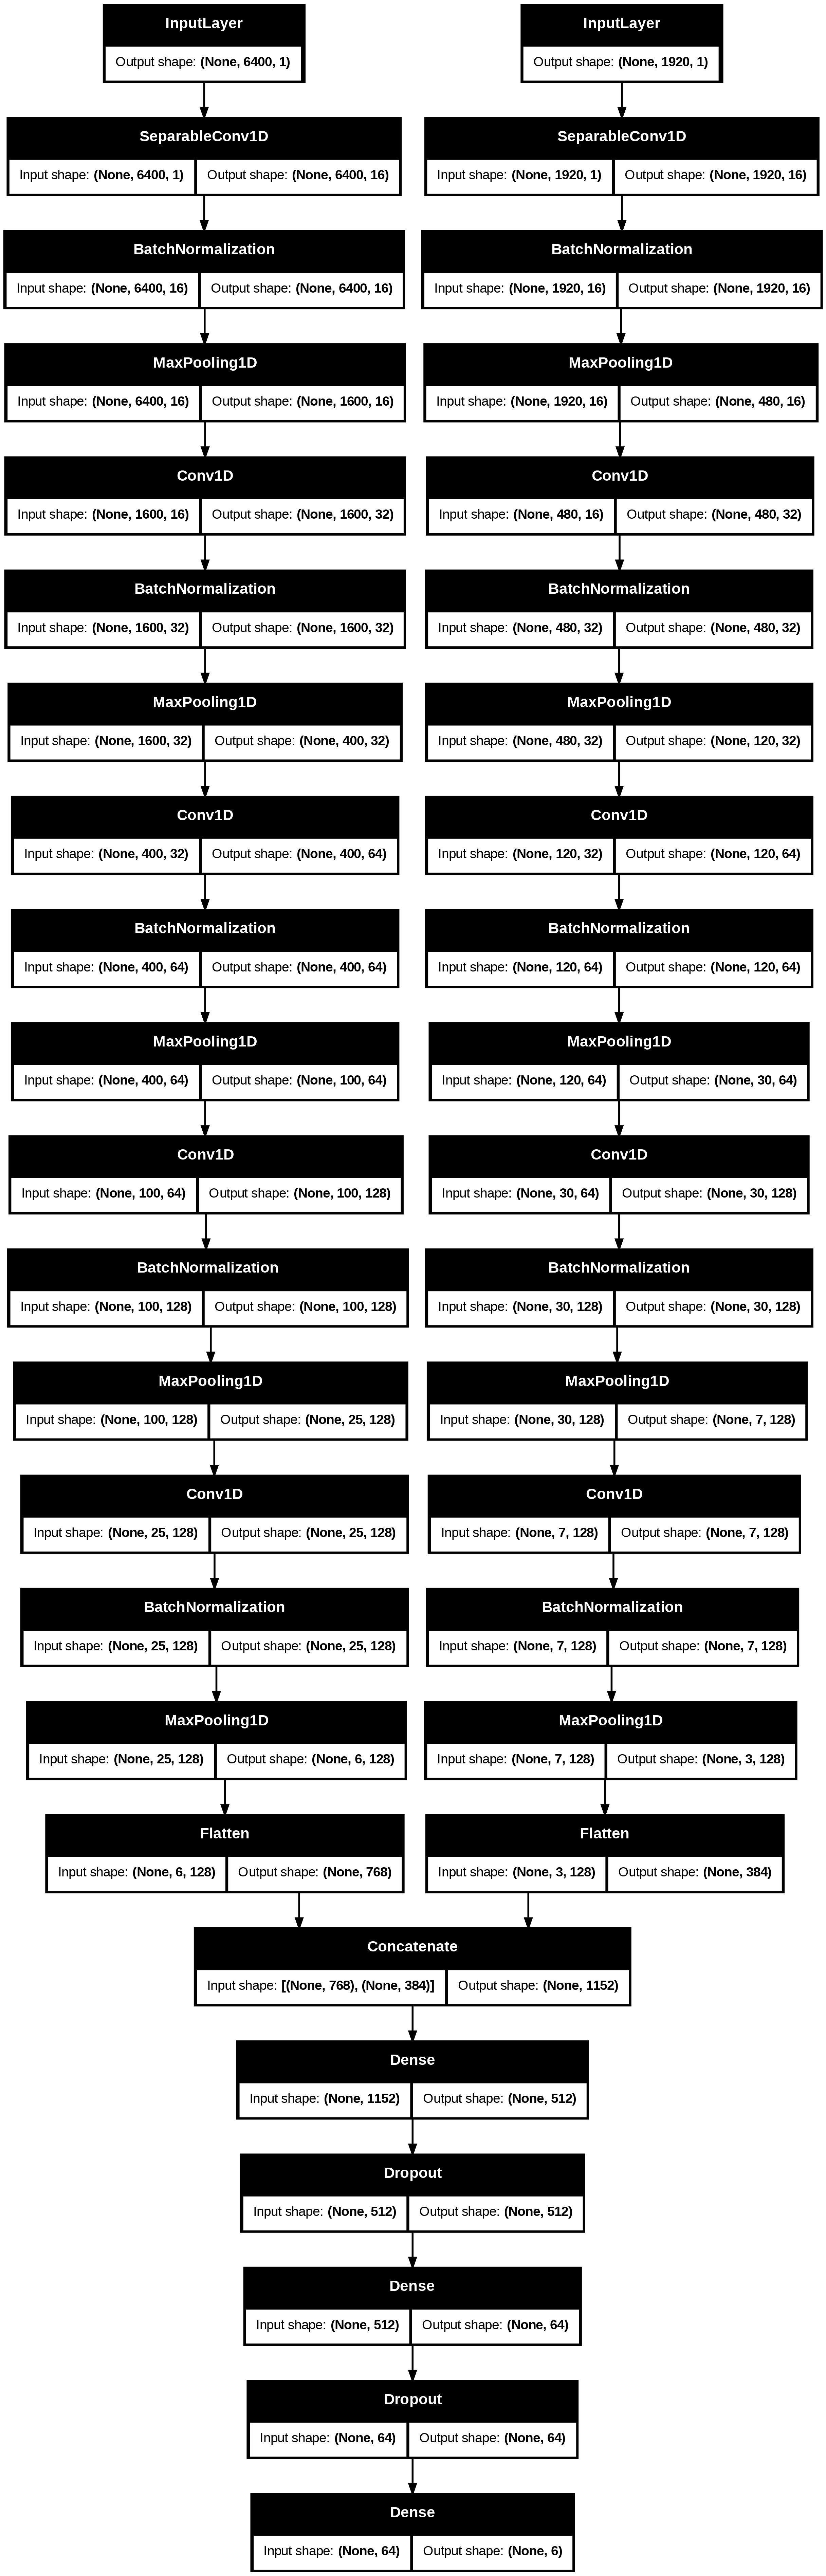

In [15]:
tf.keras.utils.plot_model(mymodels[0].model, show_shapes=True)

# **Training of the model in the different folds**

Results with **CPU**

In [17]:
batch,epochs,Preds=32,100,[]
for i in range(k):
  print("Training the model TA-CNN in the Fold: ", i+1)
  model, historia = ModelTrain(mymodels[i].model, {'PCAInput': TrainPCA[i], 'TSNEInput': TrainTSNE[i]}, TrainCategorical[i], {'PCAInput': TestPCA[i], 'TSNEInput': TestTSNE[i]}, TestCategorical[i], epochs, batch)
  model.set_weights(best_weights_callback.best_weights)
  Probs=model.predict({'PCAInput': TestPCA[i], 'TSNEInput': TestTSNE[i]})
  Preds.append(Probs.argmax(axis=1))


Training the model TA-CNN in the Fold:  1
Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.2491 - loss: 2.1509New best validation accuracy: 0.14102564752101898
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 322ms/step - accuracy: 0.2537 - loss: 2.1351 - val_accuracy: 0.1410 - val_loss: 1.7921
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.6677 - loss: 0.9197New best validation accuracy: 0.1666666716337204
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 300ms/step - accuracy: 0.6698 - loss: 0.9161 - val_accuracy: 0.1667 - val_loss: 1.8182
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.8272 - loss: 0.5964New best validation accuracy: 0.19230769574642181
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 372ms/step - accuracy: 0.8276 - loss: 0.5945 - val_accuracy: 0.1923 - val_loss: 1.8286
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.9143 - loss: 0.3216New best validation accuracy: 0.2094017118215561
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 293ms/step - accuracy: 0.9143 - 

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step
Training the model TA-CNN in the Fold:  4
Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 404ms/step - accuracy: 0.2592 - loss: 2.5291 - val_accuracy: 0.2607 - val_loss: 1.7714
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 283ms/step - accuracy: 0.6467 - loss: 1.0448 - val_accuracy: 0.2650 - val_loss: 1.7433
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 296ms/step - accuracy: 0.7992 - loss: 0.5995 - val_accuracy: 0.2222 - val_loss: 1.6903
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 380ms/step - accuracy: 0.9016 - loss: 0.3820 - val_accuracy: 0.2179 - val_loss: 1.6446
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 369ms/step - accuracy: 0.9449 - loss: 0.2250 - val_accuracy: 0.2179 - val_loss: 1.6044
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - accuracy: 0.9750 - loss: 0.1508 - val_accuracy: 0.2949 - val_loss: 1.5117
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 369ms/step - accuracy: 0.9670 - loss: 0.1399 - val_accuracy: 0.3590 - val_loss: 1.4089
Epoch 8/100

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step


## **Results of the model's performance metrics in the different folds**

In [18]:
Preds=np.array(Preds)
TestLabel=np.array(TestLabel)

In [23]:
Accuracy,F1Score,Recall,Precision=[],[],[],[]
for i in range(k):
  Accuracy.append(accuracy_score(TestLabel[i],Preds[i]))
  F1Score.append(f1_score(TestLabel[i],Preds[i], average='weighted'))
  Recall.append(recall_score(TestLabel[i],Preds[i], average='weighted'))
  Precision.append(precision_score(TestLabel[i],Preds[i], average='weighted'))
  print("\n Fold: ",i+1)
  print(confusion_matrix(TestLabel[i],Preds[i]))
  print("Accuracy: ", Accuracy[i])
  print("f1 Score: ", F1Score[i])
  print("Recall: ", Recall[i])
  print("Precision: ", Precision[i])
  #print("AUC: ", roc_auc_score(TestLabel[i],Preds[i], average='weighted', multi_class='ovr')) #Discontinued

print("\nMean Accuracy: ",np.mean(Accuracy))
print("Mean f1 Score: ",np.mean(F1Score))
print("Mean Recall: ",np.mean(Recall))
print("Mean Precision: ",np.mean(Precision))


 Fold:  1
[[34  1  0  0  0  0]
 [ 0 42  0  0  0  0]
 [ 0  0 38  0  0  0]
 [ 0  1  0 41  1  0]
 [ 1  0  0  0 41  0]
 [ 0  1  0  0  0 33]]
Accuracy:  0.9786324786324786
f1 Score:  0.9787198800322835
Recall:  0.9786324786324786
Precision:  0.9794871794871794

 Fold:  2
[[38  0  0  0  0  0]
 [ 0 43  0  0  0  0]
 [ 0  0 37  0  0  0]
 [ 0  0  0 42  0  0]
 [ 0  0  0  0 42  0]
 [ 0  0  0  1  0 31]]
Accuracy:  0.9957264957264957
f1 Score:  0.9957177172863447
Recall:  0.9957264957264957
Precision:  0.9958258795468098

 Fold:  3
[[36  0  0  0  0  0]
 [ 0 36  0  0  0  0]
 [ 0  0 46  0  0  0]
 [ 0  0  0 39  0  0]
 [ 0  0  0  0 33  0]
 [ 0  0  0  0  0 44]]
Accuracy:  1.0
f1 Score:  1.0
Recall:  1.0
Precision:  1.0

 Fold:  4
[[47  0  0  0  0  0]
 [ 0 35  0  0  0  0]
 [ 0  0 35  0  0  0]
 [ 0  0  0 32  0  0]
 [ 0  0  0  0 39  0]
 [ 0  0  0  0  0 46]]
Accuracy:  1.0
f1 Score:  1.0
Recall:  1.0
Precision:  1.0

Mean Accuracy:  0.9935897435897436
Mean f1 Score:  0.9936093993296571
Mean Recall:  0.99358